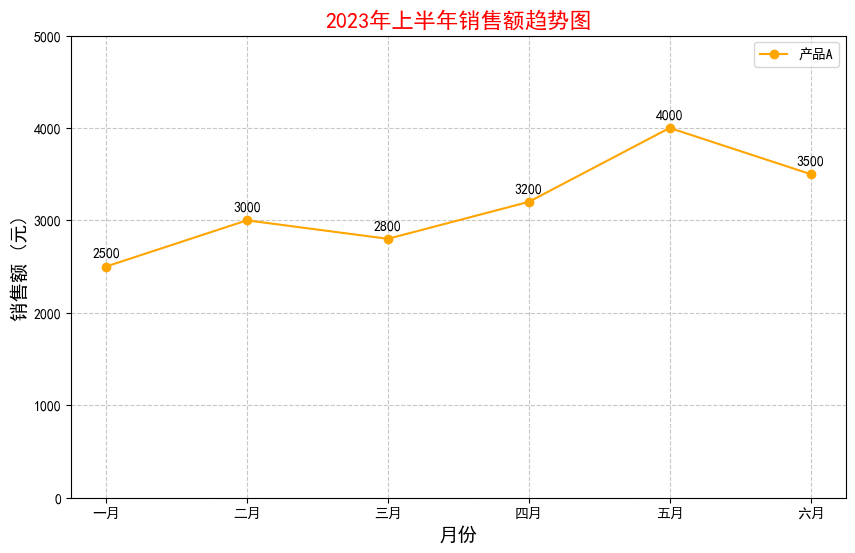

In [9]:
'''
折线图
'''
import matplotlib.pyplot as plt
#设置windows下中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']

#数据
months = ['一月','二月','三月','四月','五月','六月']
sales = [2500,3000,2800,3200,4000,3500]

#创建图表
plt.figure(figsize=(10,6))
#创建图形
plt.plot(months,sales,marker='o',linestyle='-',color='orange',label='产品A')
#添加标题和标签
plt.title('2023年上半年销售额趋势图',fontsize=16,color='red')
plt.xlabel('月份',fontsize=14)
plt.ylabel('销售额 (元)',fontsize=14)
#添加网格和图例
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend()
#设置y轴范围
plt.ylim(0,5000)
#悬停显示数据
for i, value in enumerate(sales):
    plt.text(months[i], value + 100, str(value), ha='center', fontsize=10)
#鼠标悬停显示数据
# for i, value in enumerate(sales):
#     plt.annotate(str(value), xy=(months[i], value), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)
#显示图表 
plt.show()


In [ ]:
# #创建柱状图
# plt.bar(months,sales,color='skyblue',label='产品A')
# #创建条形图
# plt.barh(months,sales,color='lightgreen',label='产品A')

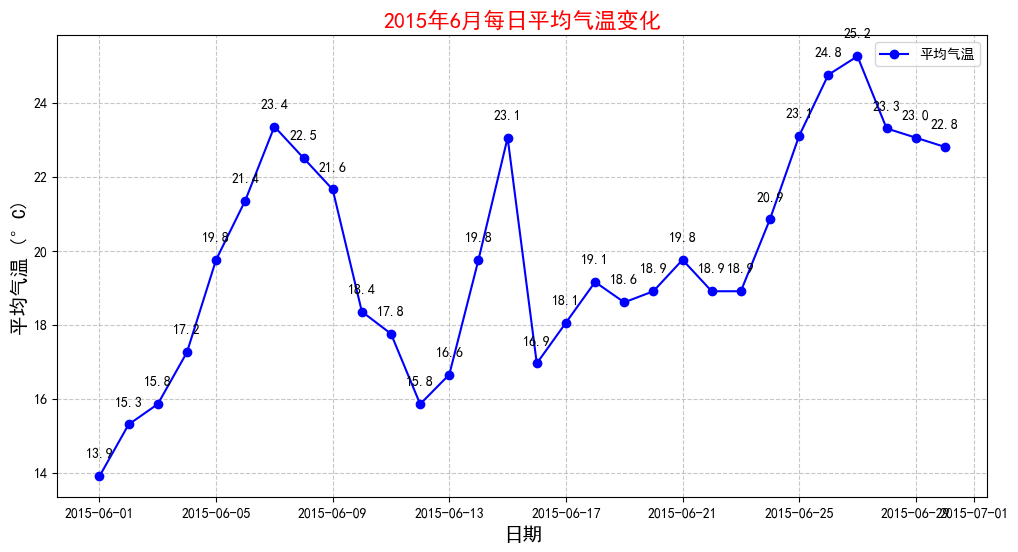

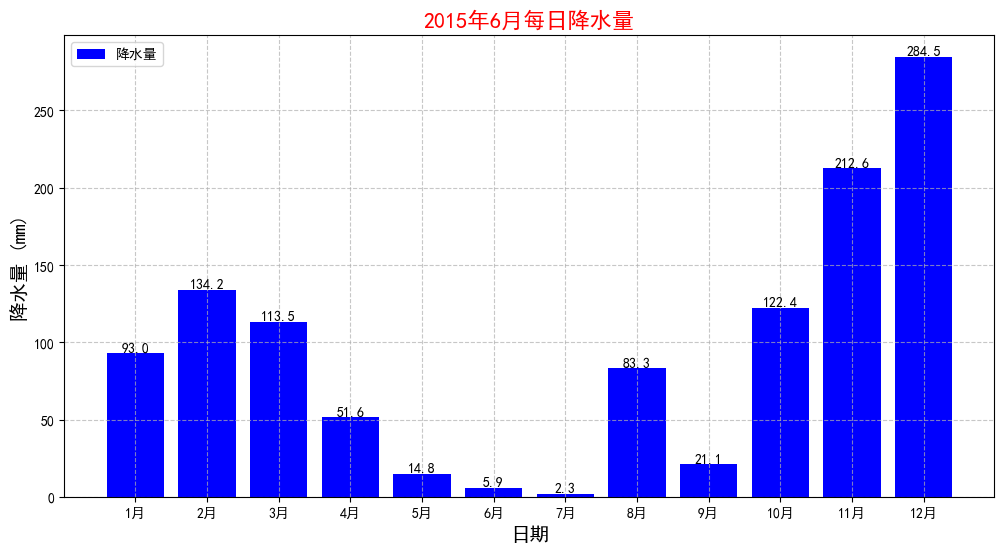

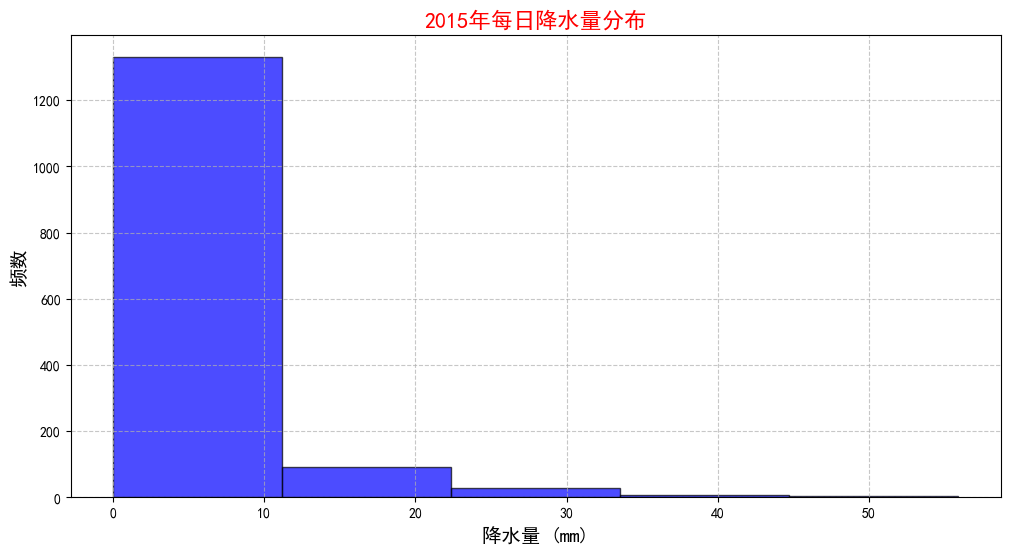

In [29]:
#导入数据
import pandas as pd
data = pd.read_csv('../data/weather.csv')
#将日期列转换为datetime类型
data['date'] = pd.to_datetime(data['date'])
# #查看数据
# print(data.head())
# data.info()
#计算2015年一月份每日的平均气温
january_data = data[(data['date'].dt.year == 2015) & (data['date'].dt.month == 6)]
# avg_temp = january_data['temp_max'] + january_data['temp_min'] / 2
avg_temp = (january_data['temp_max'] + january_data['temp_min']) / 2
# print(avg_temp)
#创建折线图
plt.figure(figsize=(12,6))
plt.plot(january_data['date'],avg_temp,marker='o',linestyle='-',color='blue',label='平均气温')
#添加标题和标签
plt.title('2015年6月每日平均气温变化',fontsize=16,color='red')
plt.xlabel('日期',fontsize=14)
plt.ylabel('平均气温 (°C)',fontsize=14)
#添加网格和图例
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend()
#设置y轴范围
# plt.ylim(-10,20)
#悬停显示数据
for i, value in enumerate(avg_temp):
    plt.text(january_data['date'].iloc[i], value + 0.5, f"{value:.1f}", ha='center', fontsize=10)
#显示图表
plt.show()

plt.figure(figsize=(12,6))
#绘制2015年每月降水量柱状图
#计算每月降水量总和
monthly_precipitation = data[data['date'].dt.year == 2015].groupby(data['date'].dt.month)['precipitation'].sum()
plt.bar(monthly_precipitation.index,monthly_precipitation.values,color='blue',label='降水量')
#添加标题和标签
plt.title('2015年6月每日降水量',fontsize=16,color='red')
plt.xlabel('日期',fontsize=14)
plt.ylabel('降水量 (mm)',fontsize=14)
#添加网格和图例
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend()
#x轴显示每个月
# plt.xticks(f"{monthly_precipitation.index}月")
plt.xticks(monthly_precipitation.index, [f"{month}月" for month in monthly_precipitation.index])
#悬停显示数据
for i, value in enumerate(monthly_precipitation.values):
    plt.text(monthly_precipitation.index[i], value + 1, f"{value:.1f}", ha='center', fontsize=10)
#显示图表
plt.show()

#绘制降水量直方图
plt.figure(figsize=(12,6))
#bins表示柱子的数量
plt.hist(data['precipitation'],bins=5,color='blue',edgecolor='black',alpha=0.7)
#添加标题和标签
plt.title('2015年每日降水量分布',fontsize=16,color='red')
plt.xlabel('降水量 (mm)',fontsize=14)
plt.ylabel('频数',fontsize=14)
#添加网格
plt.grid(True,linestyle='--',alpha=0.7)
#显示图表
plt.show()

<Axes: xlabel='bill_length_mm', ylabel='Density'>

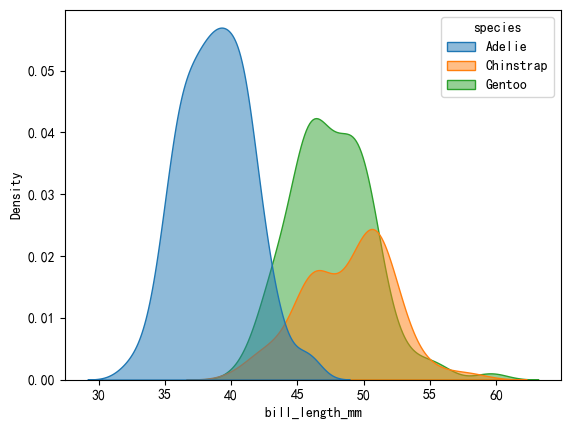

In [38]:
#seaborn库绘图
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

penguins = pd.read_csv('../data/penguins.csv')
#去重  inplace=True会直接在原数据上修改，返回值为None
penguins.dropna(inplace=True)
penguins.head()

# #直方图
# sns.histplot(data=penguins,x = 'species')

#核密度估计图
sns.kdeplot(data=penguins,x='bill_length_mm',hue='species',fill=True,alpha=0.5)

<Axes: xlabel='island', ylabel='count'>

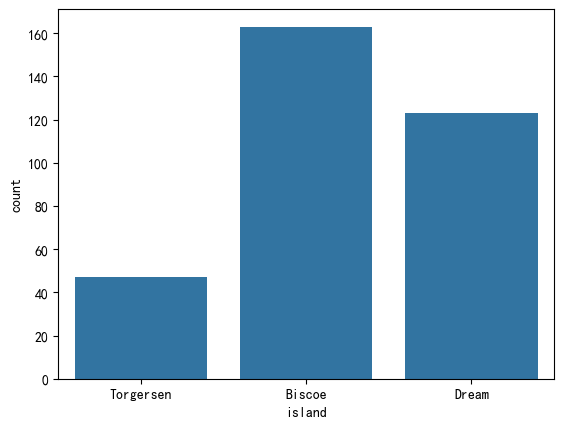

In [39]:
#计数图
sns.countplot(data=penguins,x='island')

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

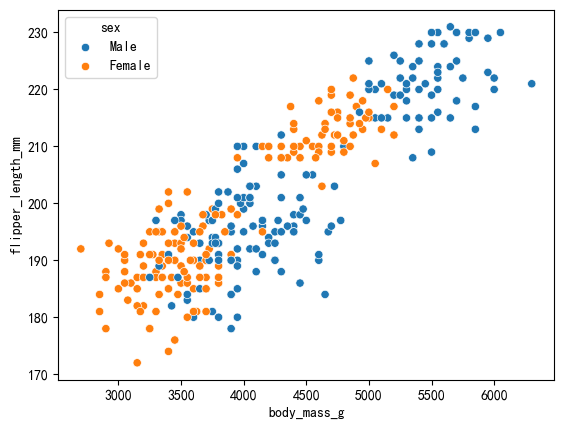

In [ ]:
#散点图
#hue 表示按性别分色
sns.scatterplot(data=penguins,x='body_mass_g',y='flipper_length_mm',hue='sex')

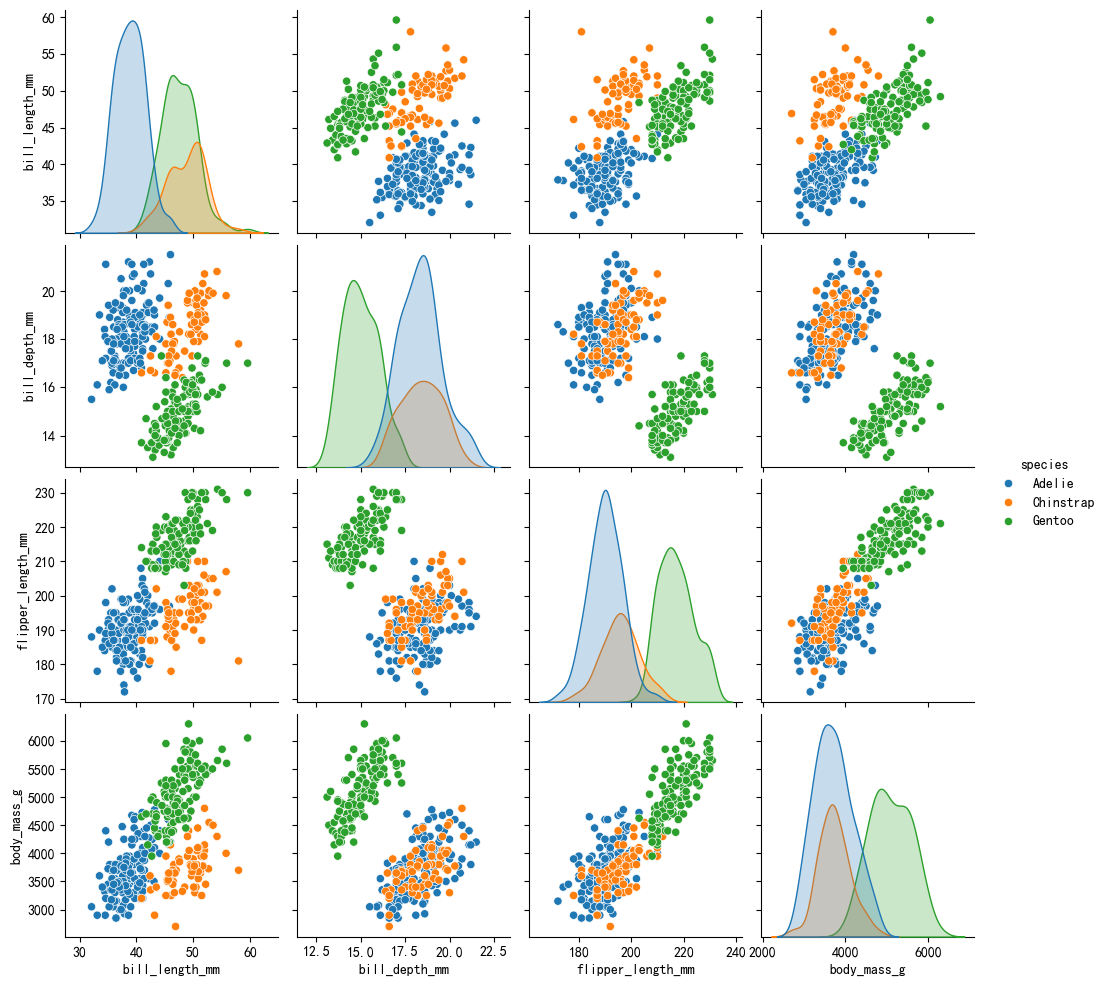

In [41]:
#成对关系图
sns.pairplot(data = penguins,hue='species')